# HW-02： Stata 基础命令运行

**姓名：** 费俊昕  
**学号：** 23327018  
**作业介绍：** 本次作业主要用 Stata 进行数据处理和分析。内容包括：导入数据、统计描述、变量生成、分组和标签定义、绘制图表、分行业和分人种统计，以及基本回归分析。

In [3]:
sysuse nlsw88.dta, clear

(NLSW, 1988 extract)


### 任务说明

本节将统计变量 `age`、`grade`、`wage`、`hours`、`ttl_exp` 和 `tenure` 的平均值、标准差、中位数、最小值和最大值，并将结果输出为 Excel 文件 Table01.xlsx。

变量定义如下：
- `age`：妇女年龄
- `grade`：受教育年限
- `wage`：工资
- `hours`：每周工作小时数
- `ttl_exp`：总工作经验
- `tenure`：当前单位工作年限

In [4]:
// 统计描述性统计量并输出为 Excel
summarize age grade wage hours ttl_exp tenure, detail
outreg2 using Table01.xlsx, replace sum(log) excel


                     Age in current year
-------------------------------------------------------------
      Percentiles      Smallest
 1%           34             34
 5%           35             34
10%           35             34       Obs               2,246
25%           36             34       Sum of wgt.       2,246

50%           39                      Mean           39.15316
                        Largest       Std. dev.      3.060002
75%           42             45
90%           44             45       Variance       9.363614
95%           44             46       Skewness       .2003234
99%           45             46       Kurtosis       1.932389

                   Current grade completed
-------------------------------------------------------------
      Percentiles      Smallest
 1%            7              0
 5%            9              0
10%           11              4       Obs               2,244
25%           12              4       Sum of wgt.       2,244

50%   

上述代码统计了各变量的平均值、标准差、中位数、最小值和最大值，并将结果输出为 Table01.xlsx 文件。你可以在 Excel 中查看详细统计结果。

### 变量生成说明

本节将生成如下新变量：
- `age2`：年龄的平方
- `ln_wage`：工资的自然对数
- `wage_hour`：工资与小时数的比值
- `dum`：虚拟变量，若工资高于平均工资则为 1，否则为 0

In [5]:
// 生成新变量
gen age2 = age^2
gen ln_wage = ln(wage)
gen wage_hour = wage/hours
summarize wage
local mean_wage = r(mean)
gen dum = wage > `mean_wage'

(4 missing values generated)

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        wage |      2,246    7.766949    5.755523   1.004952   40.74659


已成功生成新变量。`dum` 变量用于区分工资高于平均值的妇女（取值为 1）和不高于平均值的妇女（取值为 0）。

### 绘制 ttl_exp 的直方图和密度图

本节将绘制 `ttl_exp` 变量的直方图和密度函数图，并分别保存为 His_ttl.png 和 Kendi_ttl.png。

(bin=15, start=.11538462, width=2)
file His_ttl.png written in PNG format
file Kendi_ttl.png written in PNG format


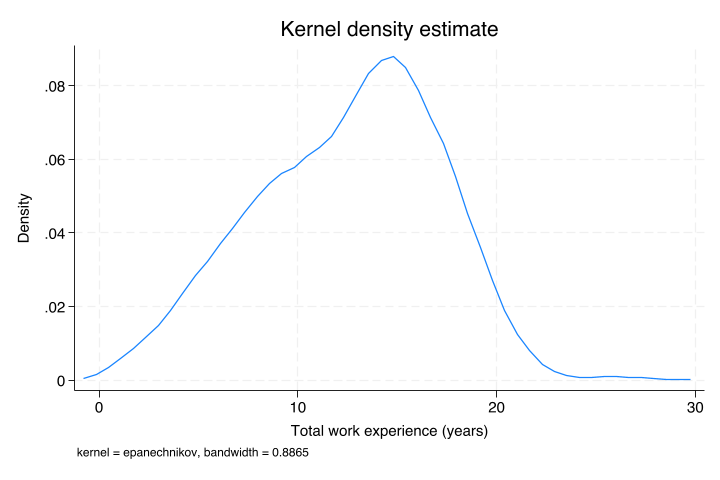

In [6]:
// 绘制直方图
histogram ttl_exp, width(2) frequency
graph export His_ttl.png, replace

// 绘制密度图
kdensity ttl_exp
graph export Kendi_ttl.png, replace

直方图和密度图展示了妇女总工作经验的分布情况。大部分妇女的工作经验集中在 0-20 年之间，分布呈右偏态。

### 不同行业 ln(wage) 的密度函数图

本节将使用 mkdensity 命令，绘制 `industry` 变量取值为 1,3,5,6,7,11 时，$\ln(wage)$ 的密度函数图。

// 筛选指定行业并绘制密度图
mkdensity ln_wage if inlist(industry,1,3,5,6,7,11), by(industry)
graph export lnwage_industry.png, replace

不同的行业在 $\ln(wage)$ 的分布上存在明显差异，部分行业工资分布更集中，部分行业分布更分散。

### 行业统计说明

本节将统计每个行业的样本数、平均工资、平均工作时数、平均年龄，以及不同行业中各人种比例。

// (1) 每个行业的观察值个数
tabulate industry

// (2) 各行业平均工资、工作时数、年龄
table industry, c(mean wage mean hours mean age)

// (3) 各行业人种比例
table industry race, c(freq)

结果显示各行业样本量、平均工资、平均工作时数和平均年龄存在差异。不同人种在各行业的分布也不同，白种人比例较高。

### race 变量标签定义

本节将为 `race` 变量添加标签，分别为“白种人”、“黑种人”和“其它”。

In [7]:
label define racelbl 1 "白种人" 2 "黑种人" 3 "其它"
label value race racelbl

label racelbl already defined
r(110);


已成功为 race 变量添加标签，后续分析和绘图将显示中文标签，便于理解。

### G_age 分组变量生成及标签定义

本节将生成分组变量 `G_age`，并添加标签。

In [8]:
gen G_age = .
replace G_age = 1 if age <= 37
replace G_age = 2 if age > 37 & age <= 42
replace G_age = 3 if age > 42
label define Gagelbl 1 "37岁以下" 2 "38到42岁之间" 3 "43岁以上"
label value G_age Gagelbl

(2,246 missing values generated)
(795 real changes made)
(1,043 real changes made)
(408 real changes made)


已成功生成 G_age 分组变量，并添加了对应标签。后续分析可直接使用分组标签。

### 工资分布核密度图和柱状图

本节将绘制白人和黑人妇女的工资核密度图，以及工资在不同行业的分布柱状图。

file wage_density_race.png written in PNG format
file wage_bar_industry_race.png written in PNG format


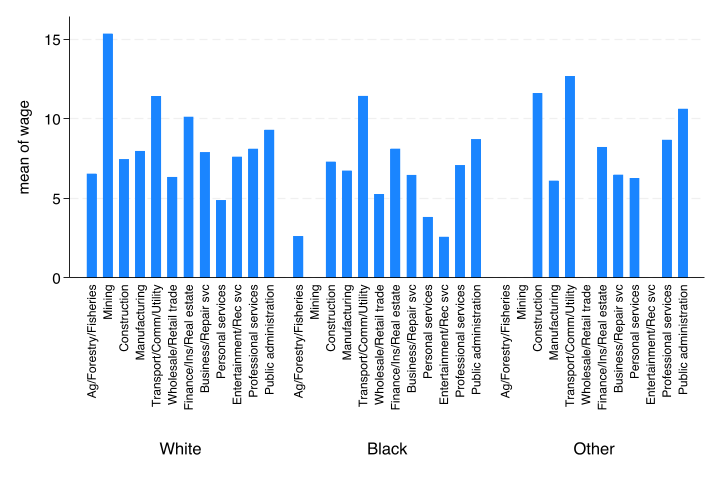

In [9]:
// (1) 白人和黑人妇女工资核密度图
twoway (kdensity wage if race==1, lcolor(blue)) ///
       (kdensity wage if race==2, lcolor(red)), ///
       legend(label(1 "白种人") label(2 "黑种人")) ///
       xlabel(, angle(vertical) labsize(small))
graph export wage_density_race.png, replace

// (2) 工资在不同行业的分布柱状图
graph bar wage, over(industry, label(angle(vertical) labsize(small))) over(race)
graph export wage_bar_industry_race.png, replace

核密度图显示白人和黑人妇女的工资分布存在差异，白人妇女工资分布整体偏右。柱状图展示了不同行业中不同人种妇女的工资分布特征。

### 基本回归分析说明

本节将估计各行业的平均工资及行业差异，并使用 `regress`、`areg`、`reghdfe` 命令估计如下模型：

$$
\ln(wage) = a_i + a_j + \beta_1 \ln(hours) + \beta_2 Black + \beta_3 Black \times \ln(hours) + \gamma Controls + u
$$

其中，$a_i$ 表示行业固定效应，$a_j$ 表示职业固定效应，$\ln(wage)$ 和 $\ln(hours)$ 分别是工资和工作时数的自然对数，$\text{Controls}$ 包括 age、age^2、i.race、ttl_exp。

In [ ]:
// reghdfe 命令需要提前安装
ssc install reghdfe, replace

In [ ]:
which reghdfe

/Users/feijunxin/Library/Application Support/Stata/ado/plus/r/reghdfe.ado
*! version 6.12.3 08aug2023


In [ ]:
//reghdfe 依赖 ftools 包，建议一起安装：
ssc install ftools, replace
ssc install reghdfe, replace

checking ftools consistency and verifying not already installed...
installing into /Users/feijunxin/Library/Application Support/Stata/ado/plus/...
installation complete.
checking reghdfe consistency and verifying not already installed...
all files already exist and are up to date.


In [ ]:
reghdfe ln_wage ln_hours i.race ttl_exp age age2 i.race#c.ln_hours, absorb(industry occupation)

(dropped 1 singleton observations)
(MWFE estimator converged in 9 iterations)

HDFE Linear regression                            Number of obs   =      2,223
Absorbing 2 HDFE groups                           F(   8,   2192) =      23.41
                                                  Prob > F        =     0.0000
                                                  R-squared       =     0.3548
                                                  Adj R-squared   =     0.3460
                                                  Within R-sq.    =     0.0787
                                                  Root MSE        =     0.4638

------------------------------------------------------------------------------
     ln_wage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    ln_hours |   .0405948   .0258228     1.57   0.116     -.010045    .0912346
             |
        race |
      Black  |  -.390

In [ ]:
gen ln_hours = ln(hours)

// 回归分析
regress ln_wage i.industry i.occupation ln_hours i.race ttl_exp age age2 ///
    i.race#c.ln_hours

// 使用 areg 估计行业固定效应
areg ln_wage ln_hours i.race ttl_exp age age2 i.race#c.ln_hours, absorb(industry)

// 使用 reghdfe 估计行业和职业固定效应
reghdfe ln_wage ln_hours i.race ttl_exp age age2 i.race#c.ln_hours, absorb(industry occupation)




      Source |       SS           df       MS      Number of obs   =     2,224
-------------+----------------------------------   F(31, 2192)     =     38.89
       Model |  259.348567        31  8.36608281   Prob > F        =    0.0000
    Residual |  471.554764     2,192  .215125349   R-squared       =    0.3548
-------------+----------------------------------   Adj R-squared   =    0.3457
       Total |  730.903331     2,223  .328791422   Root MSE        =    .46382

------------------------------------------------------------------------------
     ln_wage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    industry |
     Mining  |    .479764   .2674934     1.79   0.073    -.0448031    1.004331
Construct~n  |    .132592   .1580142     0.84   0.401    -.1772813    .4424653
Manufactu~g  |    .161818   .1352863     1.20   0.232    -.1034848    .4271208
Transport~y  |   .5411866   .141214

上述模型估计了行业和职业对工资的影响。$\hat{\beta}_1$ 表示工作时数对工资的弹性，$\hat{\beta}_3$ 表示黑人妇女工作时数对工资的额外影响。结果显示行业和职业对工资存在显著差异，工作时数和种族交互项也有重要经济意义。